<a href="https://colab.research.google.com/github/VamK2/Data-Science-Machine-Learning/blob/main/VamsiK2_Neural_Networks_Bannk_Customers_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks: Bank Customers Churn prediction**

# **Problem Statement**

## **Context**

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

## **Objective**

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )


* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

In [ ]:
!pip install scikeras

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# The following package from scikit_learn is depricated, resuting in error
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# I used the following and works.
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UAT AI MLGL/Introduction to Deep Neural Networks/Deep Learning/Week 2: Building Blocks of Neural Network/Project 7: Deep Neural Networks: Bank Churn Prediction /Copy of Churn.csv")  # Code to read the dataset

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
ds = df.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
ds.head() ## Code to display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.tail() ## Code to display the last 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
ds.shape ## Code to get the shape of data

(10000, 14)

In [ ]:
#ds.shape() ## Complete the code to get the shape of data
print("There are", ds.shape[0], 'rows and', ds.shape[1], "columns.") # Checking shape of the data
print(ds.shape)

There are 10000 rows and 14 columns.
(10000, 14)


### Check the data types of the columns for the dataset

### Checking the Statistical Summary

In [ ]:
ds.info() ## Code to print the statistical summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [ ]:
#!pip install skimpy

In [ ]:
#from skimpy import skim

In [ ]:
#skim(ds)

In [ ]:
#!pip install dfSummary

### Checking for unique values for each of the column

In [ ]:
unique_values = {col: ds[col].unique() for col in ds.columns}
print(unique_values) ## Code to get the unique values in each of the column

{'RowNumber': array([    1,     2,     3, ...,  9998,  9999, 10000]), 'CustomerId': array([15634602, 15647311, 15619304, ..., 15584532, 15682355, 15628319]), 'Surname': array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object), 'CreditScore': array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 5

In [ ]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Checking for Missing Values

In [ ]:
ds.duplicated().sum() ## Code to check duplicate entries in the data

0

In [ ]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [ ]:
# RowNumber , CustomerId and Surname are unique hence drop them
ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace = True)  # Code to drop the columns with most unique values

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

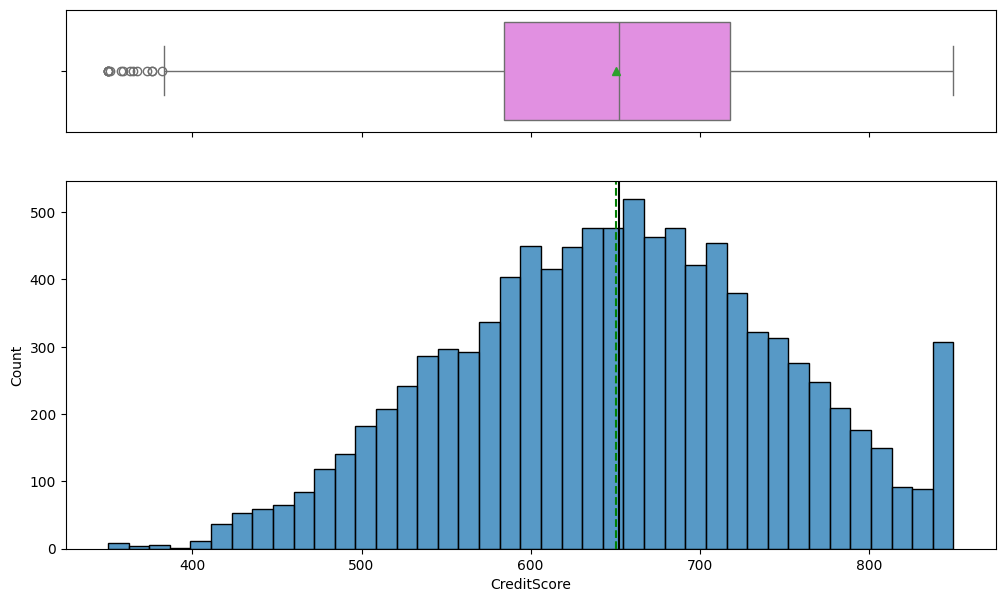

In [ ]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

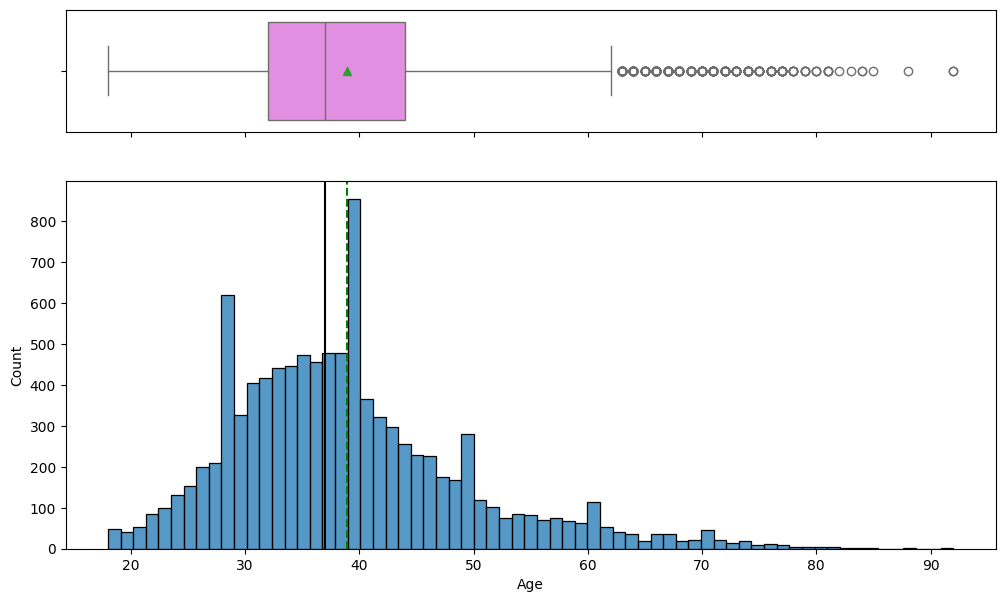

In [ ]:
histogram_boxplot(ds,'Age')  ## Code to create histogram_boxplot for CreditScore

#### Observations on Balance

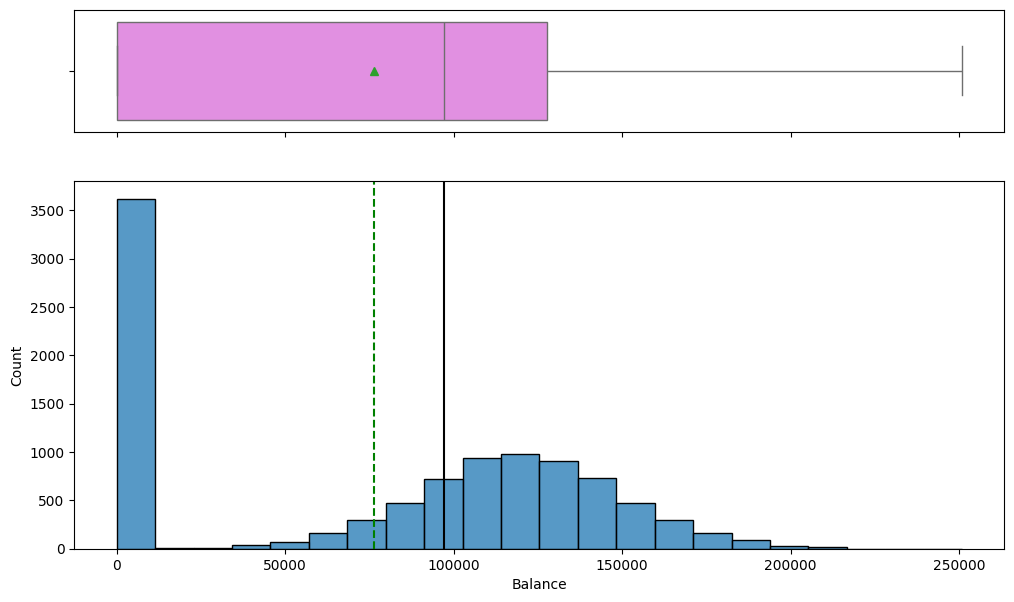

In [ ]:
histogram_boxplot(ds,'Balance')          ## Code to create histogram_boxplot for Balance

#### Observations on Estimated Salary

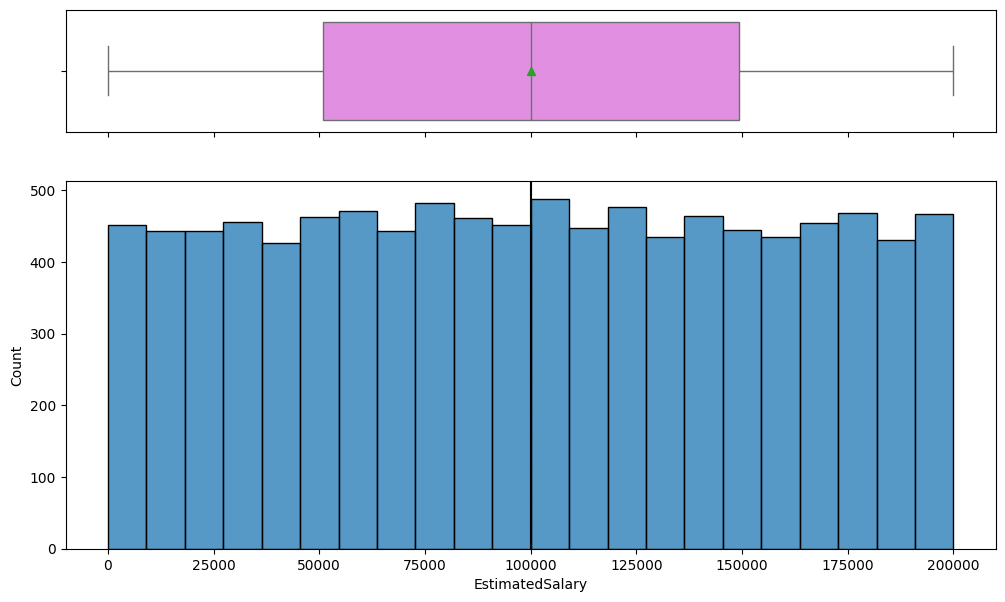

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')          ## Code to create histogram_boxplot for Estimated Salary

#### Observations on Exited

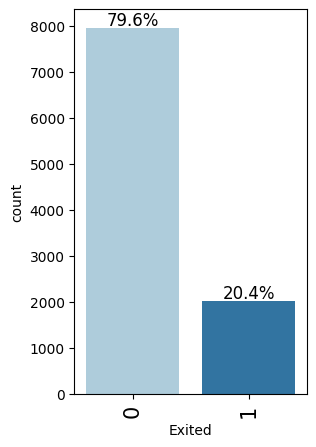

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

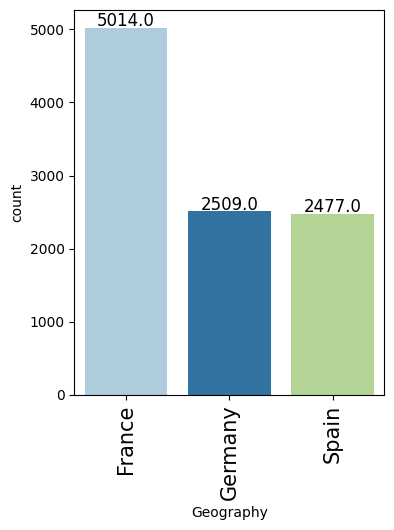

In [ ]:
labeled_barplot(ds,'Geography')               ## Code to create labeled_barplot for Geography

#### Observations on Gender

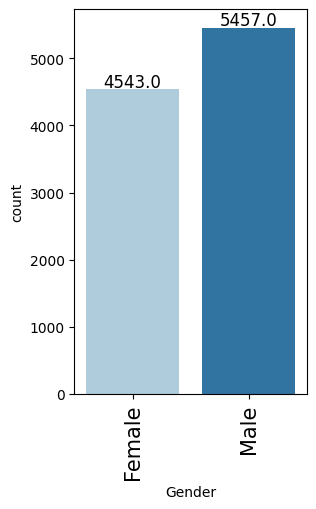

In [ ]:
labeled_barplot(ds,'Gender')               ## Code to create labeled_barplot for Gender

#### Observations on Tenure

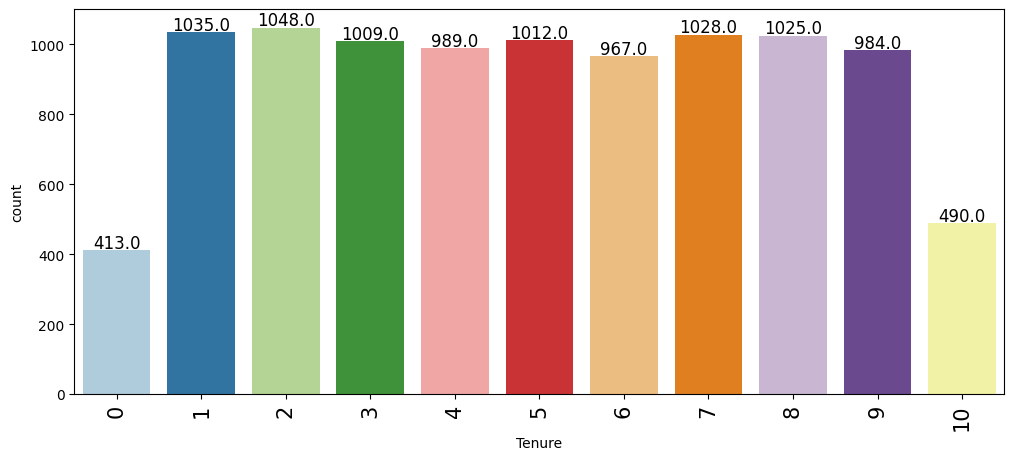

In [ ]:
labeled_barplot(ds,'Tenure')               ## Code to create labeled_barplot for Tenure

#### Observations on Number of Products

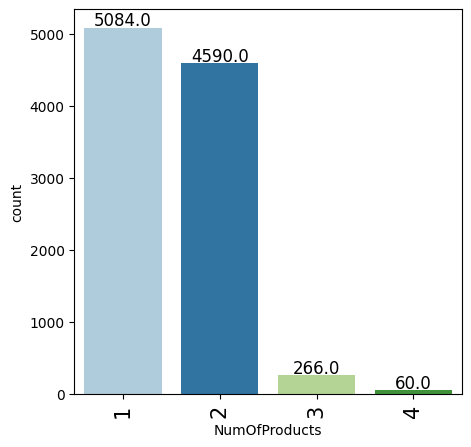

In [ ]:
labeled_barplot(ds,'NumOfProducts')               ## Code to create labeled_barplot for Number of products

#### Observations on Has Credit Card

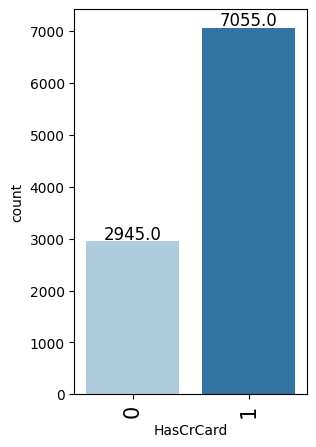

In [ ]:
labeled_barplot(ds,'HasCrCard')               ## Code to create labeled_barplot for Has credit card

#### Observations on Is Active Member

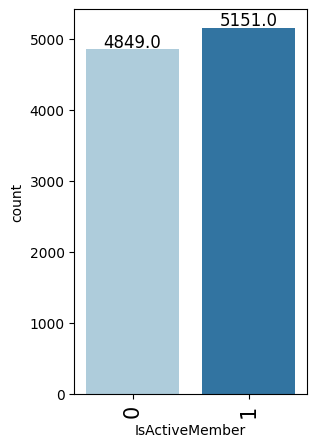

In [ ]:
labeled_barplot(ds,'IsActiveMember')               ## Code to create labeled_barplot for Is active member

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

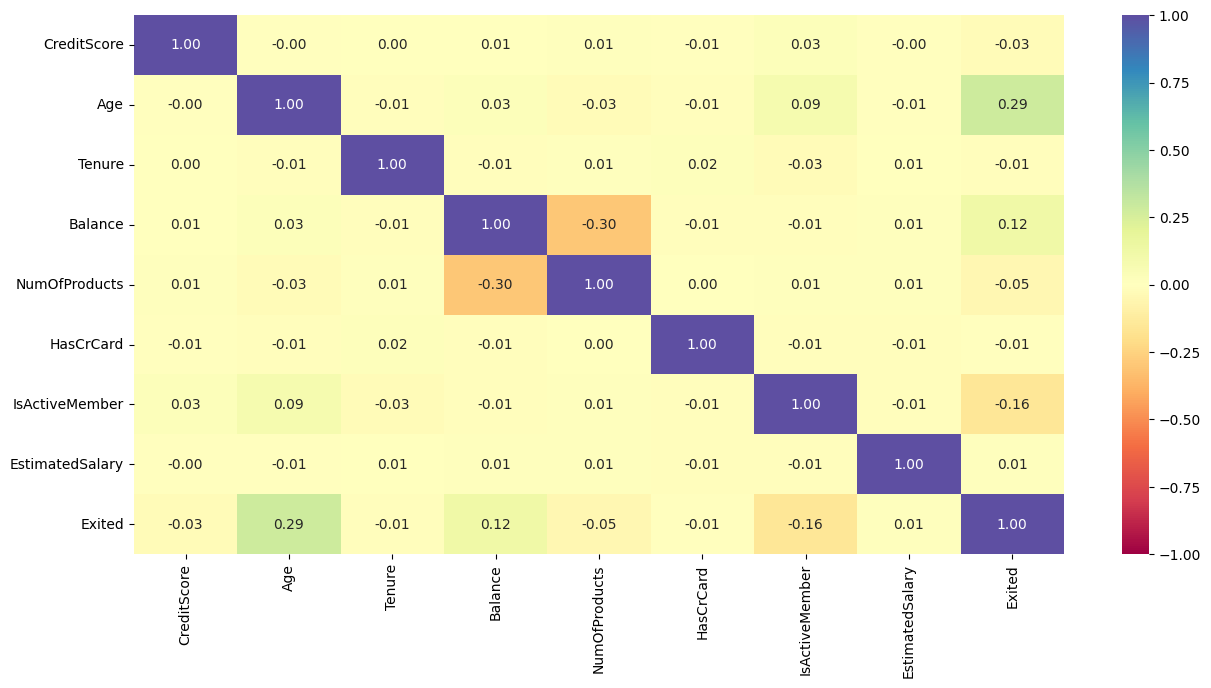

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Code to get the heatmap of the data
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


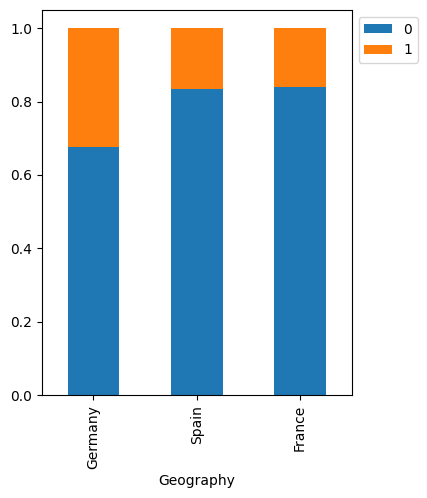

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


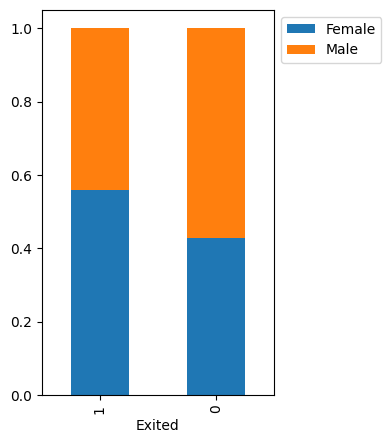

In [ ]:
stacked_barplot(ds,'Exited','Gender')                   ## Code to plot stacked barplot for Exited and Number of follow ups

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


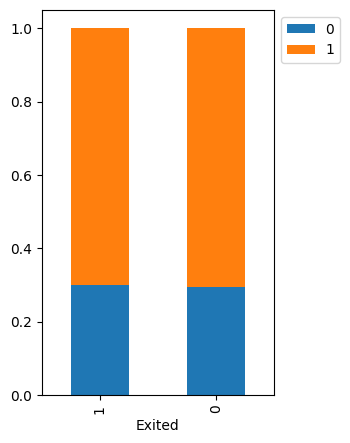

In [ ]:
stacked_barplot(ds,'Exited', 'HasCrCard')                   ## Code to plot stacked barplot for Exited and Has credit card

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


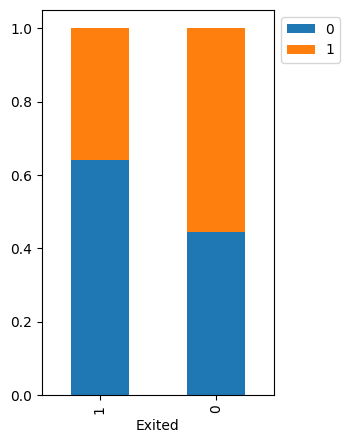

In [ ]:
stacked_barplot(ds,'Exited', 'IsActiveMember')                   ## Code to plot stacked barplot for Exited and Is active member

#### Exited Vs Credit Score

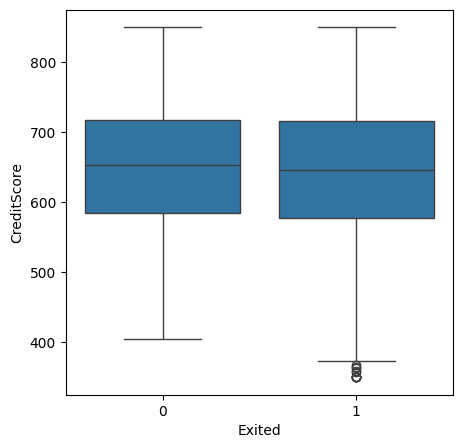

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

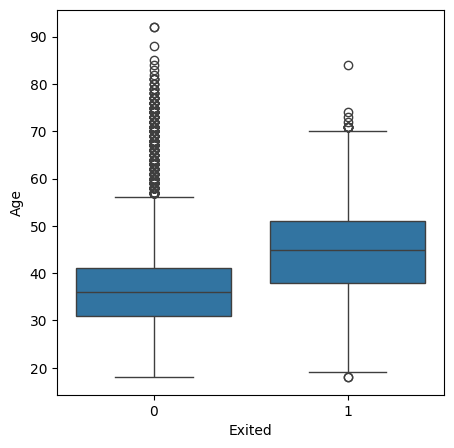

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age', x='Exited',data=ds)               ## Code to plot the boxplot for Exited and Age
plt.show()

#### Exited Vs Tenure

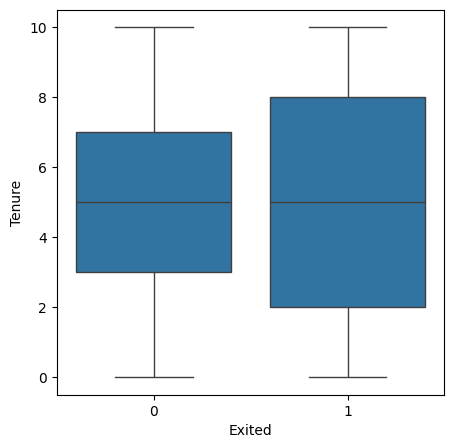

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Code to plot the boxplot for Exited and Tenure
plt.show()

#### Exited Vs Balance

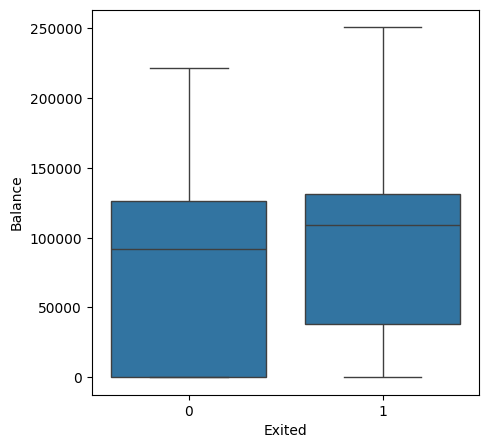

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Code to plot the boxplot for Exited and Balance
plt.show()

#### Exited Vs Number of Products

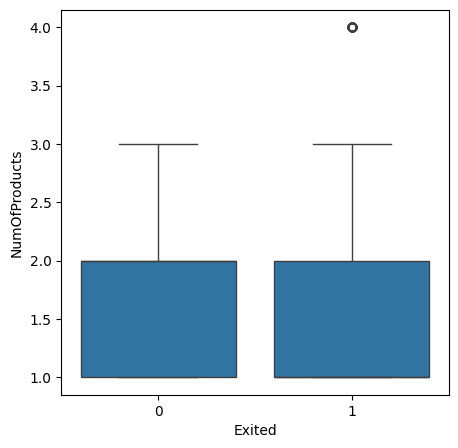

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts', x='Exited',data=ds)               ## Code to plot the boxplot for Exited and Number of products
plt.show()

#### Exited Vs Estimated Salary

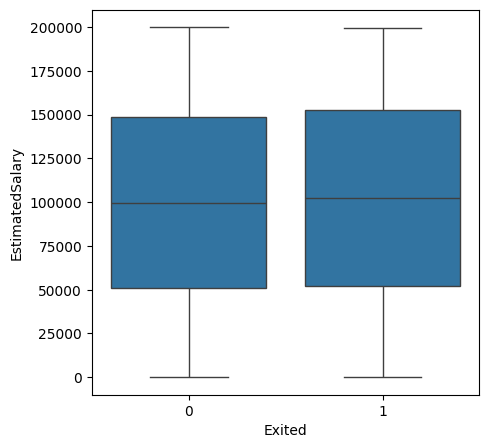

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary', x='Exited', data=ds)               ## Code to plot the boxplot for Exited and Salary
plt.show()

## Data Preprocessing

- We want to predict the churn.
- Before we proceed to build a model, We'll split the data into train and test to be able to evaluate the model that we build on the train data
-  we'll have to encode categorical features.
- We will build a model using the train data and then check it's performance

### Data Preparation for Modeling

In [ ]:
X = ds.drop(['Exited'],axis=1)    ## Code to obtain the independent features into variable X
y = ds['Exited']                ## Code to obtain the dependent features into variable y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [ ]:
# # Splitting the dataset into the Training and Testing set.

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Code to Split the X and y and obtain test set

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(8000, 10) (1500, 10) (500, 10)


In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify=y, shuffle = True) ## Code to Split X_large and y_large to obtain train and validation sets

**Create dummy variables for string type variables**

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=['Geography','Gender'],drop_first=True)  ## Code to encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=['Geography','Gender'],drop_first=True)   ## Code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=['Geography','Gender'],drop_first=True)     ## Code to encode Geography and Gender in validation set

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2151,753,57,7,0.00,1,1,0,159475.08,0,0,1
8392,739,32,3,102128.27,1,1,0,63981.37,1,0,1
5006,755,37,0,113865.23,2,1,1,117396.25,1,0,0
4117,561,37,5,0.00,2,1,0,83093.25,0,0,1
7182,692,49,6,110540.43,2,0,1,107472.99,1,0,1


**Normalize the numerical data**

In [ ]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

In [ ]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (8000, 11)
X_test Shape :  (500, 11)
y_train Shape :  (8000,)
y_test Shape :  (500,)


In [ ]:
X_train.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2151,1.058568,1.715086,0.684723,-1.226059,1,1,0,1.042084,0,0,1
8392,0.913626,-0.659935,-0.696202,0.413288,1,1,0,-0.623556,1,0,1
5006,1.079274,-0.184931,-1.731895,0.601687,2,1,1,0.308128,1,0,0
4117,-0.929207,-0.184931,-0.005739,-1.226059,2,1,0,-0.290199,0,0,1
7182,0.427035,0.955079,0.339492,0.548318,2,0,1,0.135042,1,0,1


In [ ]:
X_test.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2268,0.085386,1.620086,1.375185,0.760922,1,1,0,-0.003956,0,0,0
4105,1.700454,-1.039939,0.339492,-1.226059,2,0,1,1.496853,0,1,1
1172,-0.038850,0.385074,-0.696202,0.743783,2,1,1,-0.222049,1,0,0
8205,-1.798859,0.005071,-0.350971,1.703266,1,1,0,1.501790,1,0,0
2678,1.741866,-0.089930,1.720416,-1.226059,2,1,0,-1.207575,0,0,0


In [ ]:
X_val.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,-0.680735,-0.279932,0.684723,-1.226059,2,1,0,-0.095021,0,0,1
3667,-1.301915,-0.564935,-0.350971,0.877113,2,0,0,-0.778941,1,0,1
1617,-0.970619,0.100072,-0.350971,-1.226059,2,0,1,0.099469,0,1,0
5673,-0.121674,-0.469934,-0.005739,1.011458,2,0,0,-1.147374,0,1,1
4272,-0.111321,-0.469934,-0.696202,0.023204,1,1,1,1.200283,0,1,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   float64
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(5), int64(3), uint8(3)
memory usage: 585.9 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 8000 entries, 2151 to 6206
Series name: Exited
Non-Null Count  Dtype
--------------  -----
8000 non-null   int64
dtypes: int64(1)
memory usage: 125.0 KB


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = 'relu', input_dim = 11, units=64))

# Code to add the 1st hidden layer with 32 neurons
classifier.add(Dense(units=32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Code to Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Code to obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Code to fit the model on train data for 100 epochs
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.7905 - val_loss: 0.4870 - val_accuracy: 0.7965
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.7965 - val_loss: 0.4579 - val_accuracy: 0.7970
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8005 - val_loss: 0.4420 - val_accuracy: 0.8000
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4356 - accuracy: 0.8054 - val_loss: 0.4328 - val_accuracy: 0.8045
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4294 - accuracy: 0.8095 - val_loss: 0.4266 - val_accuracy: 0.8060
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8126 - val_loss: 0.4224 - val_accuracy: 0.8075
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4221 - accuracy: 0.8164 - val_loss: 0.4191 - val_accuracy: 0.8115

In [ ]:
print("Type of classifier:", type(classifier))
print("Type of X_train:", type(X_train))
print("Type of y_train:", type(y_train))
print("Type of X_val:", type(X_val))
print("Type of y_val:", type(y_val))
#print("Type of history:", type(history))

Type of classifier: <class 'keras.src.engine.sequential.Sequential'>
Type of X_train: <class 'pandas.core.frame.DataFrame'>
Type of y_train: <class 'pandas.core.series.Series'>
Type of X_val: <class 'pandas.core.frame.DataFrame'>
Type of y_val: <class 'pandas.core.series.Series'>


In [ ]:
# # For numpy arrays or pandas dataframes
# print("Data type of elements in X_train:", X_train.dtype)
# print("Data type of elements in y_train:", y_train.dtype)
# print("Data type of elements in X_val:", X_val.dtype)
# print("Data type of elements in y_val:", y_val.dtype)

# For other objects, you might need to access an element first
# print("Data type of an element in classifier:", type(classifier[0][0]))
# print("Data type of an element in history:", type(history.history['loss'][0]))

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
#print("Data type of a specific column in X_train:", X_train['column_name'].type)


**Loss function**

16/16 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8740


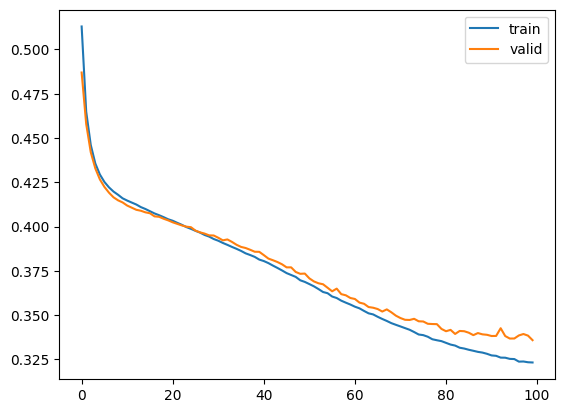

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Code to evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

**Confusion matrix**

63/63 [==============================] - 0s 1ms/step


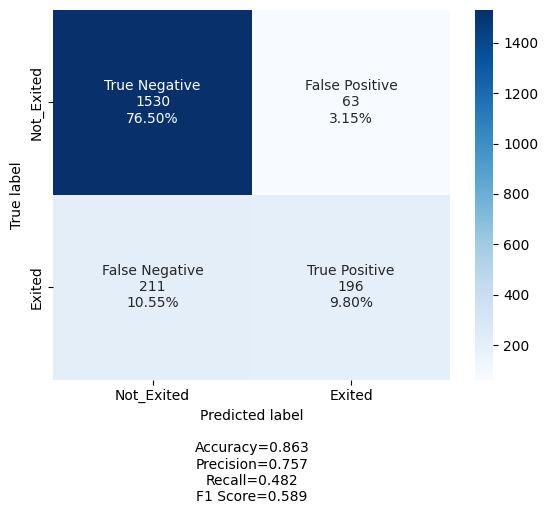

In [ ]:
## Code to obtain the prediction on X_val and obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ##Code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ## Code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ## Code to add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## Code to initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Code to fit the model on train data
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.8037 - val_loss: 0.4132 - val_accuracy: 0.8200
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8230 - val_loss: 0.3949 - val_accuracy: 0.8350
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8336 - val_loss: 0.3950 - val_accuracy: 0.8340
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3820 - accuracy: 0.8411 - val_loss: 0.3822 - val_accuracy: 0.8375
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8436 - val_loss: 0.3691 - val_accuracy: 0.8400
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3612 - accuracy: 0.8478 - val_loss: 0.3639 - val_accuracy: 0.8420
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8515 - val_loss: 0.3625 - val_accuracy: 0.8460

**Loss function**

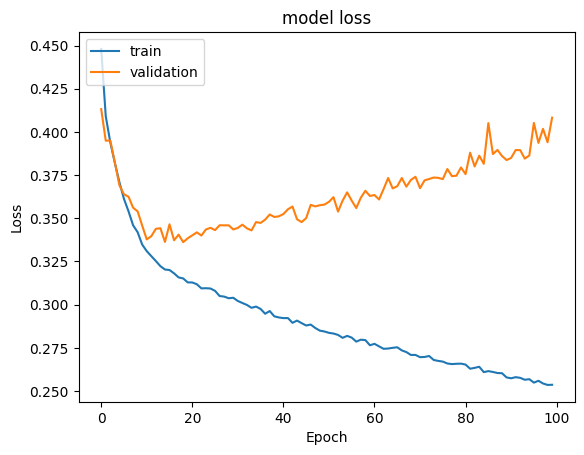

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above image, this model is severely overfitting. Deep learning models are very sensitive to overfitting due to a large number of parameters. We need to find the optimal point where the training should be stopped.

The best solution for the above problem is **Early stopping**.

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [ ]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Code to call the create_model() function
model_e=create_model()

## Code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.7914 - val_loss: 0.4210 - val_accuracy: 0.8175
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8216 - val_loss: 0.3979 - val_accuracy: 0.8360
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8363 - val_loss: 0.3915 - val_accuracy: 0.8350
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3778 - accuracy: 0.8421 - val_loss: 0.3779 - val_accuracy: 0.8405
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3649 - accuracy: 0.8484 - val_loss: 0.3625 - val_accuracy: 0.8445
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3549 - accuracy: 0.8533 - val_loss: 0.3574 - val_accuracy: 0.8505
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3472 - accuracy: 0.8556 - val_loss: 0.3568 - val_accuracy: 0.8500

**Loss function**

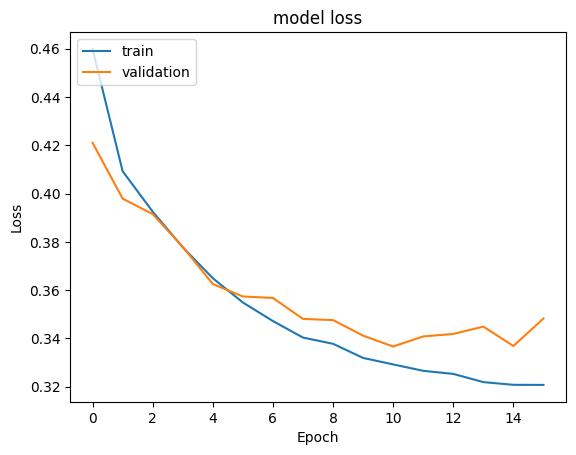

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

250/250 [==============================] - 0s 1ms/step
Best Threshold=0.233748, G-Mean=0.803


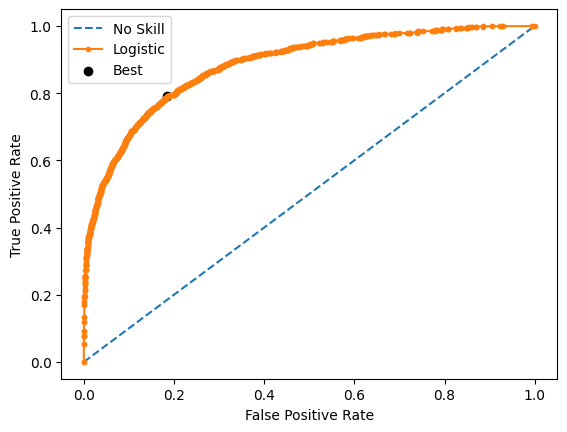

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

**Classification report**

In [ ]:
## Code to obtain the classification report Hint: use y_val
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



**Confusion matrix**

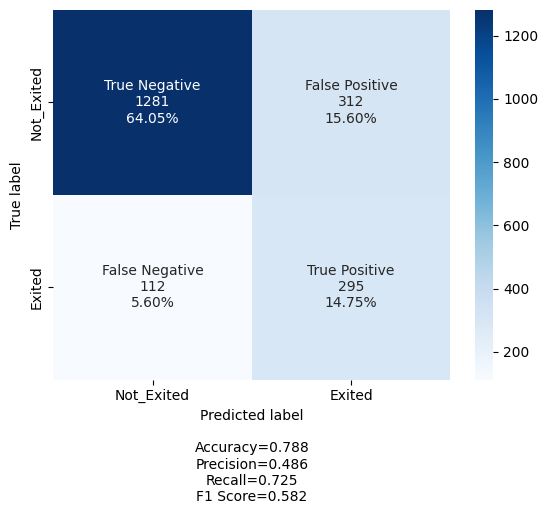

In [ ]:
## Code with y_val and y_pred_e to plot the confusion matrix

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Code to add dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Code to add dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Code to compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5059 - accuracy: 0.7588 - val_loss: 0.4376 - val_accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4455 - accuracy: 0.8006 - val_loss: 0.4208 - val_accuracy: 0.8055
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.8037 - val_loss: 0.4224 - val_accuracy: 0.8080
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8050 - val_loss: 0.4160 - val_accuracy: 0.8110
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4263 - accuracy: 0.8150 - val_loss: 0.4100 - val_accuracy: 0.8150
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8165 - val_loss: 0.4061 - val_accuracy: 0.8200
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8190 - val_loss: 0.4011 - val_accuracy: 0.8315

**Loss function**

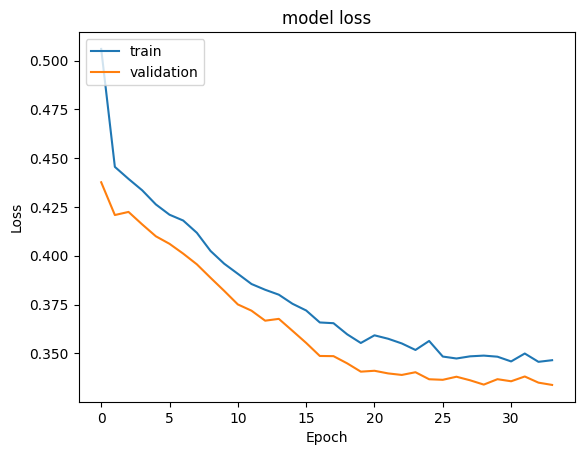

In [ ]:
# Code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

250/250 [==============================] - 0s 2ms/step
Best Threshold=0.204240, G-Mean=0.793


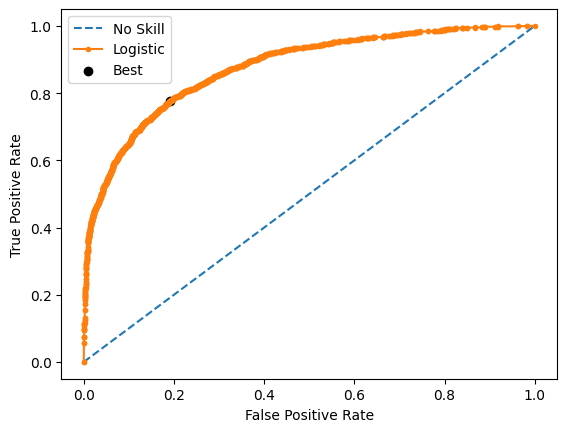

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

**Classification report**

In [ ]:
# Code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.49      0.78      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.84      0.79      0.81      2000



**Confusion report**

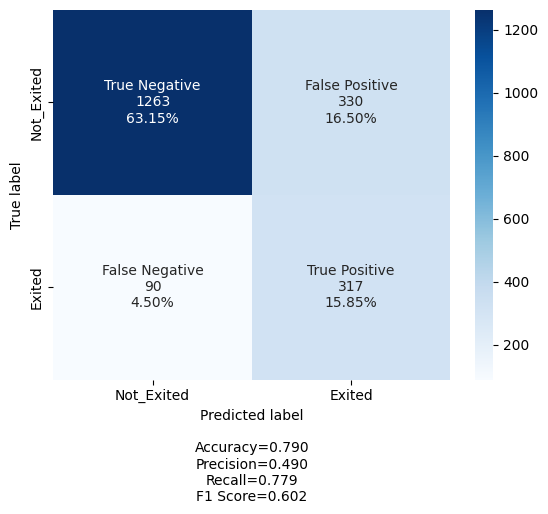

In [ ]:
# Code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [ ]:
## Code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, lr=0.001, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train, validation_data = (X_val, y_val), verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 3ms/step - loss: 0.4495 - accuracy: 0.8059 - val_loss: 0.4157 - val_accuracy: 0.8235
Best: 0.818751 using {'batch_size': 40, 'lr': 0.01}


**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.4569 - accuracy: 0.7977 - val_loss: 0.4269 - val_accuracy: 0.8185
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4273 - accuracy: 0.8174 - val_loss: 0.4179 - val_accuracy: 0.8315
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.8267 - val_loss: 0.4089 - val_accuracy: 0.8250
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8257 - val_loss: 0.3973 - val_accuracy: 0.8410
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8310 - val_loss: 0.3798 - val_accuracy: 0.8445
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8350 - val_loss: 0.3614 - val_accuracy: 0.8545
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8394 - val_loss: 0.3722 - val_accuracy: 0.8525

**Loss function**

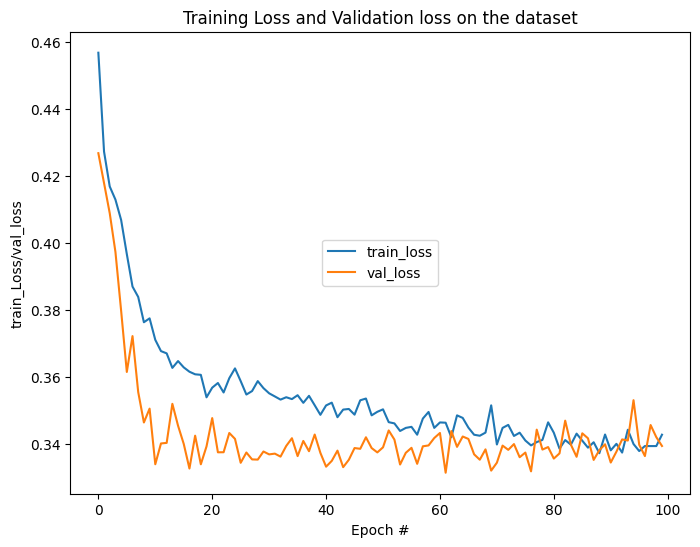

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

**Threshold**

250/250 [==============================] - 1s 2ms/step
Best Threshold=0.197777, G-Mean=0.801


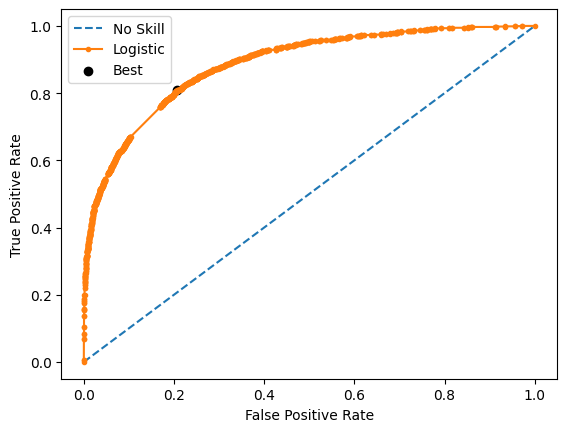

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
# Code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

63/63 [==============================] - 0s 2ms/step
[[0.02753993]
 [0.07882184]
 [0.04625509]
 ...
 [0.7551026 ]
 [0.01113144]
 [0.2399901 ]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]


**Classification report**

In [ ]:
# Code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.48      0.78      0.59       407

    accuracy                           0.78      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



**Confusion matrix**

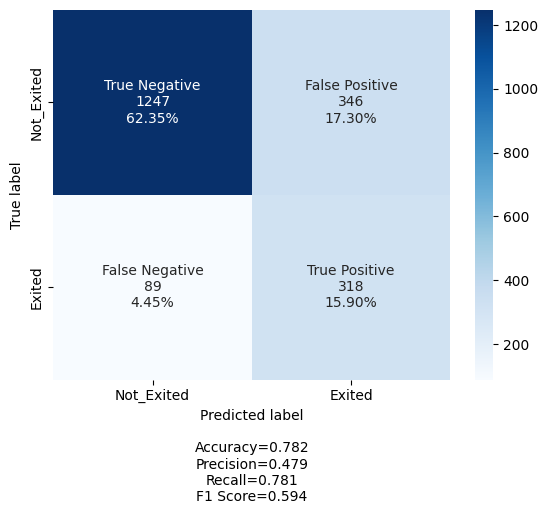

In [ ]:
## Code to obtain the confusion matrix
cm_h=metrics.confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
## Code to apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (12740, 11)
After UpSampling, the shape of train_y: (12740,) 



<Axes: ylabel='count'>

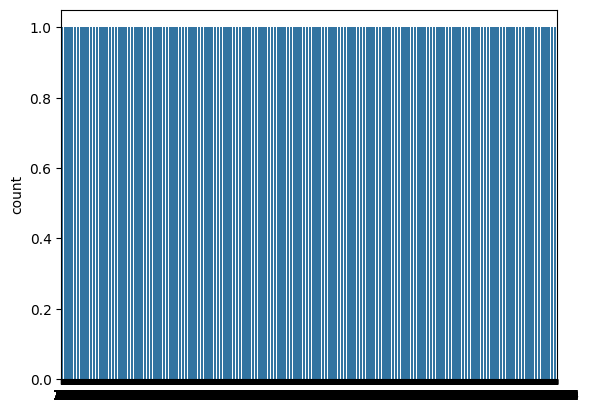

In [ ]:
sns.countplot(y_train)

**Build a model with the balanced dataset**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
## Code to initilaize a sequential model
model_4 = Sequential()

# Code to add a input layer of 32 neurons with relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Code to add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Code to add dense layers with 8 neurons
model_4.add(Dense(8,activation='relu'))

# Code to add suitable activation function in the final layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Code to obtain the summary of the model
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4

In [ ]:
# Code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6346 - accuracy: 0.6490 - val_loss: 0.5902 - val_accuracy: 0.7275
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5648 - accuracy: 0.7109 - val_loss: 0.5312 - val_accuracy: 0.7640
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5468 - accuracy: 0.7250 - val_loss: 0.5708 - val_accuracy: 0.7145
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7359 - val_loss: 0.5381 - val_accuracy: 0.7405
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.7440 - val_loss: 0.5071 - val_accuracy: 0.7615
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5142 - accuracy: 0.7491 - val_loss: 0.4907 - val_accuracy: 0.7710
Epoch 7/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5034 - accuracy: 0.7568 - val_loss: 0.5084 - val_accuracy: 0.7595

**Loss function**

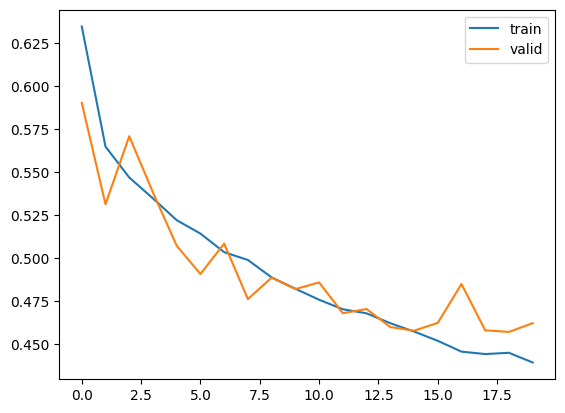

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Finding the optimal  threshold**

399/399 [==============================] - 1s 1ms/step
Best Threshold=0.551150, G-Mean=0.816


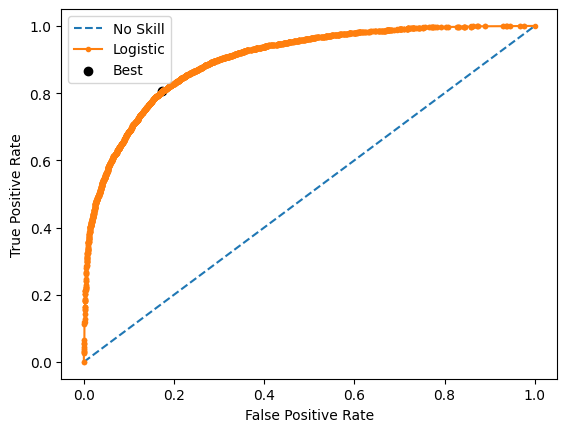

In [ ]:
## Code to find the optimal threshold using X_train
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Code to obtain the predictions on X_val
y_pred_s = model_4.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

**Classification report**

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.59       407

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.83      0.79      0.81      2000



**Confusion matrix**

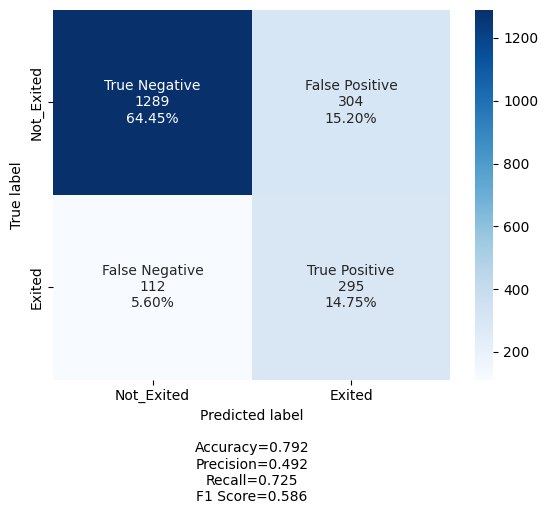

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model




399/399 [==============================] - 1s 2ms/step
Best Threshold=0.551150, G-Mean=0.816


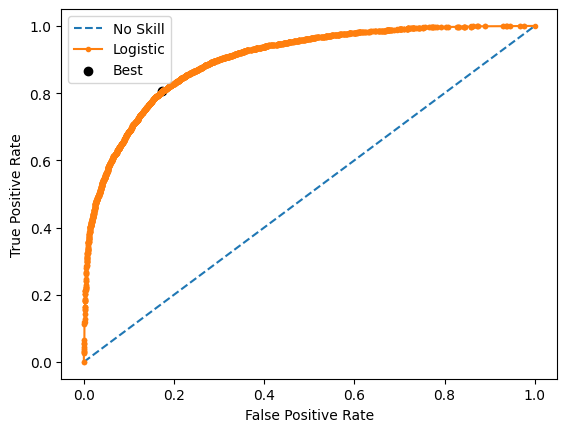

In [ ]:
# predict probabilities using the best model
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Code to Predict the X_test data using the best model
y_pred_test = model_4.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

16/16 [==============================] - 0s 2ms/step
[[ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [

**Classification report**

In [ ]:
## Code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       400
           1       0.51      0.80      0.62       100

    accuracy                           0.81       500
   macro avg       0.73      0.81      0.75       500
weighted avg       0.86      0.81      0.82       500



**Confusion report**

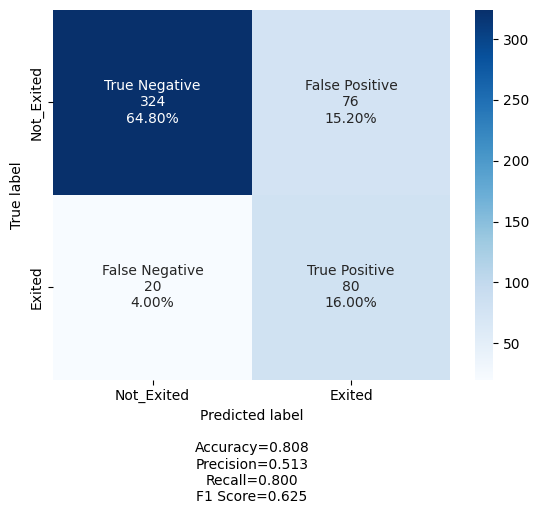

In [ ]:
# Code to obtain the confusion matrix
cm_h=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

_____